Dataset Analysing and Cleaning  task.csv

In [12]:
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

Initial data loading

In [18]:
with open(r"C:\Users\Ana\Desktop\project_ENHESA\data\task.csv", "r", encoding="utf-8") as f:
    lines = f.readlines() 

This gave me a giant list of messy lines. Many rows were split across multiple lines due to long synopses with punctuation, quotes, etc.

In [19]:
# Show first few lines to debug formatting
lines[:10]

[',Title,Synopsis,Tag;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
 '"0,I tre volti della paura,""Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the \'Three Faces of Fear\'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl who returns to her spacious, basement apartment after an evening out when she immediately gets beset by a series of strange phone calls. The caller soon identified himself as Frank, her ex-pimp who has recently escaped from prison. Rosy is terrified for it was her testimony that landed the man in jail. Looking for solace, Rosy phones her lesbian lover Mary (Lynda Alfonsi). The two women have been estranged for some time, but Rosy is certain that she is the only one who can help her. Mary agrees to come over that night. Seconds later, Frank calls again, promising that no matter who she calls for prote

Joined all the lines into one big string

In [20]:
raw_text = "".join(lines) 

In [21]:
raw_text

',Title,Synopsis,Tag;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n"0,I tre volti della paura,""Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the \'Three Faces of Fear\'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl who returns to her spacious, basement apartment after an evening out when she immediately gets beset by a series of strange phone calls. The caller soon identified himself as Frank, her ex-pimp who has recently escaped from prison. Rosy is terrified for it was her testimony that landed the man in jail. Looking for solace, Rosy phones her lesbian lover Mary (Lynda Alfonsi). The two women have been estranged for some time, but Rosy is certain that she is the only one who can help her. Mary agrees to come over that night. Seconds later, Frank calls again, promising that no matter who she calls for protection,

In [22]:
print(raw_text.count('\n'))

8619


Now I had a full-text blob, which made it easier to apply a regex. Used Regex to Extract:
- A block of text (the synopsis), 
- One of the three target labels at the end: cult, paranormal, or dramatic. That pulled out clean pairs of (text, label) from the raw data.

Check if the labels are in the end of original string:

In [23]:
print("cult:", raw_text.lower().count("cult"))
print("paranormal:", raw_text.lower().count("paranormal"))
print("dramatic:", raw_text.lower().count("dramatic"))
# tenho essa quantidade de labels. Considerei que é isso que tenho que extrair no regex, até mesmo para prevenir que o modelo tenha um aprendizado com a resposta no input.

cult: 1389
paranormal: 441
dramatic: 194


In [24]:
# Regex para capturar: ID, Título, Sinopse, Label
pattern = r'["“]?\s*(\d+)\s*,\s*(.*?)\s*,\s*["“](.*?)["”]\s*,\s*(cult|paranormal|dramatic)["”]?;'

matches = re.findall(pattern, raw_text, re.DOTALL | re.IGNORECASE)


Created a Clean DataFrame. I also normalized whitespace and label casing.

In [25]:
clean_data = pd.DataFrame(matches, columns=["id", "title", "synopsis", "target"])

In [26]:
clean_data

id                    title  \
0        0  I tre volti della paura   
1        1        Mitt liv som hund   
2        2                The Brood   
3        3              The Haunted   
4        4        The Frozen Ground   
...    ...                      ...   
1560  1561             Chuck & Buck   
1561  1562              The Manster   
1562  1563            Le grand bleu   
1563  1564     You're a Big Boy Now   
1564  1565         Petey Wheatstraw   

                                               synopsis      target  
0     "Note: this synopsis is for the orginal Italia...        cult  
1     "The action takes place in the years 1958-1959...        cult  
2     "At the Somafree Institute, Dr. Hal Raglan hum...        cult  
3     "This creepy and scary story centers around Th...  paranormal  
4     "The film opens in an Anchorage motel room in ...    dramatic  
...                                                 ...         ...  
1560  "Buck O'Brien (Mike White) is a 27-year-old am...        cult  
1561  "American foreign news correspondent Larry Sta...        cult  
1562  "Two children, Jacques Mayol (Jean-Marc Barr) ...        cult  
1563  "Bernard Chanticleer (Peter Kastner), called "...        cult  
1564  "Petey Wheatstraw (Rudy Ray Moore) is born dur...  paranormal  

[1565 rows x 4 columns]

In [27]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    # Remove lixos visuais tipo ===, ;;;;; etc.
    text = re.sub(r'[;=]{3,}', ' ', text)
    # Normaliza espaços
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Aplica para cada coluna relevante
clean_data["synopsis"] = clean_data["synopsis"].apply(clean_text).str.lower()
clean_data["title"] = clean_data["title"].apply(clean_text)
clean_data["target"] = clean_data["target"].apply(clean_text).str.lower()

In [28]:
clean_data

id                    title  \
0        0  I tre volti della paura   
1        1        Mitt liv som hund   
2        2                The Brood   
3        3              The Haunted   
4        4        The Frozen Ground   
...    ...                      ...   
1560  1561             Chuck & Buck   
1561  1562              The Manster   
1562  1563            Le grand bleu   
1563  1564     You're a Big Boy Now   
1564  1565         Petey Wheatstraw   

                                               synopsis      target  
0     "note: this synopsis is for the orginal italia...        cult  
1     "the action takes place in the years 1958-1959...        cult  
2     "at the somafree institute, dr. hal raglan hum...        cult  
3     "this creepy and scary story centers around th...  paranormal  
4     "the film opens in an anchorage motel room in ...    dramatic  
...                                                 ...         ...  
1560  "buck o'brien (mike white) is a 27-year-old am...        cult  
1561  "american foreign news correspondent larry sta...        cult  
1562  "two children, jacques mayol (jean-marc barr) ...        cult  
1563  "bernard chanticleer (peter kastner), called "...        cult  
1564  "petey wheatstraw (rudy ray moore) is born dur...  paranormal  

[1565 rows x 4 columns]

Data quality
- validating cleaning input

In [29]:
clean_data["target"].value_counts()

target
cult          1032
paranormal     366
dramatic       167
Name: count, dtype: int64

In [30]:
for label in ['cult', 'paranormal', 'dramatic']:
    examples = clean_data[clean_data["target"] == label].sample(3)
    display(examples[["title", "target", "synopsis"]])
#checking why and in what cases the regex was not able for extracting the words

title target  \
1481  Class of Nuke 'Em High   cult   
1141      Thank You Mask Man   cult   
1288          Midnight Movie   cult   

                                               synopsis  
1481  "the film follows the events that unfold at tr...  
1141  "after years of saving a small town, its popul...  
1288  "forty years after directing and starring in a...

title      target  \
710                    Lights Out  paranormal   
1267  Starship Troopers: Invasion  paranormal   
879                    Devil Doll  paranormal   

                                               synopsis  
710   "in a textile warehouse, worker esther sees a ...  
1267  "on an asteroid, the terran federation's fort ...  
879   "paul lavond (barrymore), who was wrongly conv...

title    target  \
1484   Pocketful of Miracles  dramatic   
210                 Mermaids  dramatic   
111   The Day After Tomorrow  dramatic   

                                               synopsis  
1484  "dave the dude (glenn ford) is a successful, v...  
210   "the film is narrated by charlotte flax, a qui...  
111   "paleoclimatologist jack hall and his colleagu...

In [31]:
for label in ['cult', 'paranormal', 'dramatic']:
    samples = clean_data[clean_data['target'] == label].sample(3, random_state=42)
    for _, row in samples.iterrows():
        print(f"\nTitle: {row['title']}\nLabel: {row['target']}\nText snippet: {row['synopsis'][:300]}\n{'-'*60}")


Title: Body Snatchers
Label: cult
Text snippet: "marti malone (gabrielle anwar) is a teenager alienated from her newly remarried father, an agent from the environmental protection agency (kinney) and her new stepmother (meg tilly), and her 10-year-old brother andy. marti's father has been asigned to this remote military base on an assignment to c
------------------------------------------------------------

Title: Les parapluies de Cherbourg
Label: cult
Text snippet: " part one: the departure (november, 1957) " madame emery and her beautiful 17-year-old daughter geneviève (deneuve) have a tiny and struggling umbrella boutique in the coastal town of cherbourg in normandy, france. guy (castelnuovo) is a handsome young auto mechanic who lives with and cares for his
------------------------------------------------------------

Title: Not of This Earth
Label: cult
Text snippet: "as cheryl is on her way home after making out with her boyfriend, she is accosted by a strange man who mentally 

In [32]:
missing_labels = clean_data[clean_data["target"].isna()]
print(len(missing_labels)) 

0


In [33]:
clean_data[clean_data.duplicated(subset='synopsis')].count()

id          20
title       20
synopsis    20
target      20
dtype: int64

In [34]:
clean_data = clean_data.drop_duplicates(subset='synopsis').reset_index(drop=True) 

EDA

1. Label distribuition

In [35]:
clean_data['target'].value_counts()

target
cult          1025
paranormal     354
dramatic       166
Name: count, dtype: int64

Shows clear class imbalance → you’ll want to use stratified splits or class weighting during modeling.



In [36]:
import matplotlib.pyplot as plt

2. Text Length Summary

 Estatísticas gerais da contagem de palavras:

count    1545.000000
mean      917.028479
std       871.859313
min       142.000000
25%       443.000000
50%       673.000000
75%      1034.000000
max      8755.000000
Name: word_count, dtype: float64

 Estatísticas por categoria:

             count         mean          std    min     25%    50%      75%  \
target                                                                        
cult        1025.0   889.823415   792.874329  142.0  442.00  661.0  1034.00   
dramatic     166.0  1001.728916   913.996110  166.0  447.75  742.0  1107.00   
paranormal   354.0   956.081921  1050.547129  142.0  449.25  686.0   993.75   

               max  
target              
cult        8755.0  
dramatic    6262.0  
paranormal  8487.0  


<Figure size 1000x600 with 0 Axes>

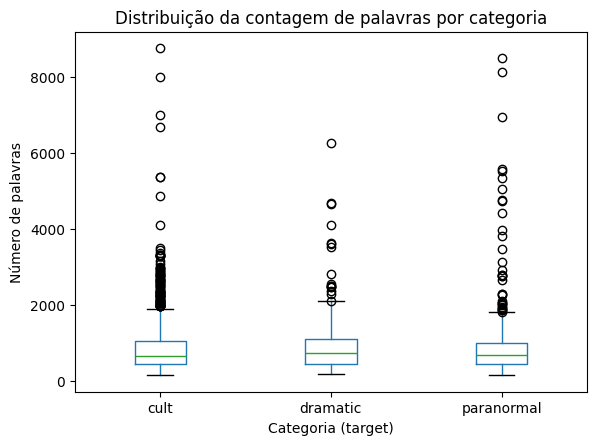

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Cria coluna com número de palavras da sinopse
clean_data['word_count'] = clean_data['synopsis'].apply(lambda x: len(str(x).split()))

# Calcular estatísticas gerais
print(" Estatísticas gerais da contagem de palavras:\n")
print(clean_data['word_count'].describe())

# Estatísticas por rótulo (target)
print("\n Estatísticas por categoria:\n")
print(clean_data.groupby("target")["word_count"].describe())

# Visualizar distribuição por label
plt.figure(figsize=(10, 6))
clean_data.boxplot(column='word_count', by='target', grid=False)
plt.title("Distribuição da contagem de palavras por categoria")
plt.suptitle("")
plt.ylabel("Número de palavras")
plt.xlabel("Categoria (target)")
plt.xticks(rotation=0)
plt.show() 

In [38]:
# salvando o dataset

In [39]:
# Salvar como CSV

clean_data.to_csv(r"C:\Users\Ana\Desktop\project_ENHESA\data\clean_data_task2.csv", index=False, encoding="utf-8")


In [40]:
clean_data

id                    title  \
0        0  I tre volti della paura   
1        1        Mitt liv som hund   
2        2                The Brood   
3        3              The Haunted   
4        4        The Frozen Ground   
...    ...                      ...   
1540  1561             Chuck & Buck   
1541  1562              The Manster   
1542  1563            Le grand bleu   
1543  1564     You're a Big Boy Now   
1544  1565         Petey Wheatstraw   

                                               synopsis      target  \
0     "note: this synopsis is for the orginal italia...        cult   
1     "the action takes place in the years 1958-1959...        cult   
2     "at the somafree institute, dr. hal raglan hum...        cult   
3     "this creepy and scary story centers around th...  paranormal   
4     "the film opens in an anchorage motel room in ...    dramatic   
...                                                 ...         ...   
1540  "buck o'brien (mike white) is a 27-year-old am...        cult   
1541  "american foreign news correspondent larry sta...        cult   
1542  "two children, jacques mayol (jean-marc barr) ...        cult   
1543  "bernard chanticleer (peter kastner), called "...        cult   
1544  "petey wheatstraw (rudy ray moore) is born dur...  paranormal   

      word_count  
0           1315  
1            512  
2           1629  
3            164  
4            873  
...          ...  
1540         468  
1541         402  
1542         966  
1543         825  
1544         334  

[1545 rows x 5 columns]

In [41]:
size_gb = clean_data.memory_usage(deep=True).sum() / (1024**3)  # Em gigabytes
print(f"Dataset size: {size_gb:.2f} GB")

Dataset size: 0.01 GB


In [42]:
from sklearn.utils import resample

In [43]:
# Ver quantas amostras queremos por classe
max_size = clean_data['target'].value_counts().max()

# Agrupar e replicar as amostras
df_balanced = pd.concat([
    resample(group, replace=True, n_samples=max_size, random_state=42)
    for _, group in clean_data.groupby('target')
])

# Resetar índices
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Salvar opcional
df_balanced.to_csv(r"C:\Users\Ana\Desktop\project_ENHESA\data\final_data.csv", index=False)

In [45]:
df_balanced['target'].value_counts()

target
cult          1025
paranormal    1025
dramatic      1025
Name: count, dtype: int64

problema: aumentou muito classe de paranomal e dramatic, risco de overfitting depois. 